# Student Performance EDA
# LIL bitch separate EDA and feature engineering

About Dataset(As per Kaggle):
This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.

The dataset is commonly used for:
- Regression modeling
- Health economics research
- Insurance pricing analysis
- Machine learning education and tutorials

Columns

age: Age of primary beneficiary (int)

sex: Gender of beneficiary (male, female)

bmi: Body Mass Index, a measure of body fat based on height and weight (float)

children: Number of children covered by health insurance (int)

smoker: Smoking status of the beneficiary (yes, no)

region: Residential region in the US (northeast, northwest, southeast, southwest)

charges: Medical insurance cost billed to the beneficiary (float)

Potential Uses

Build predictive models for medical costs
Explore how smoking and BMI impact charges
Teach students about regression and feature engineering
Analyze healthcare affordability trends

______________________________________________________________________

### **Target Variable: Charges**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df  = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

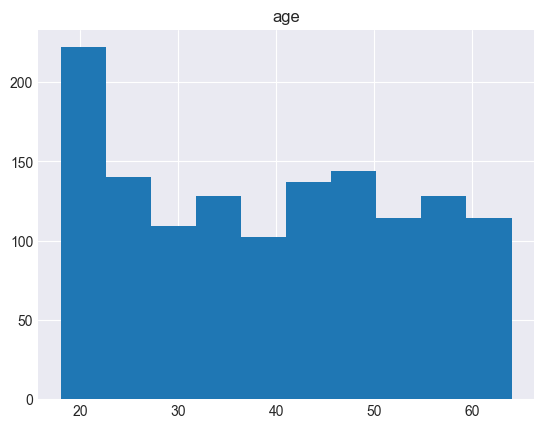

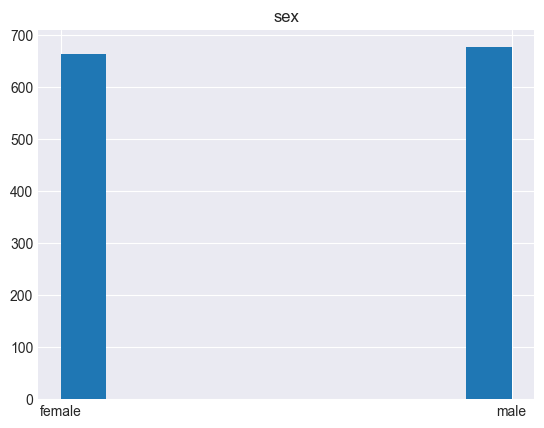

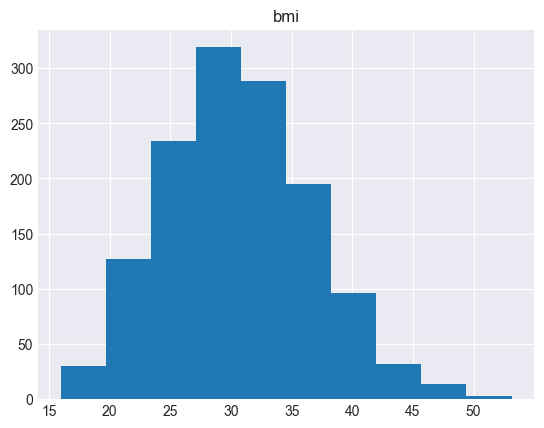

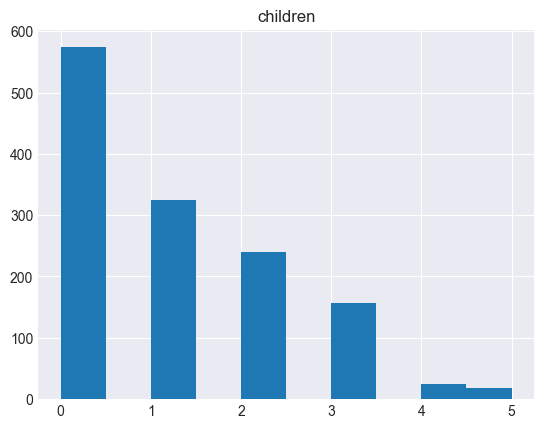

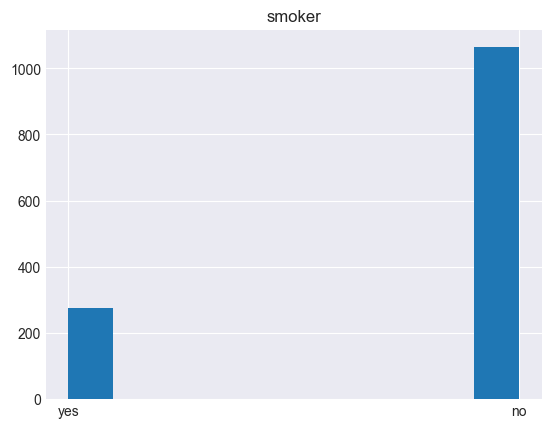

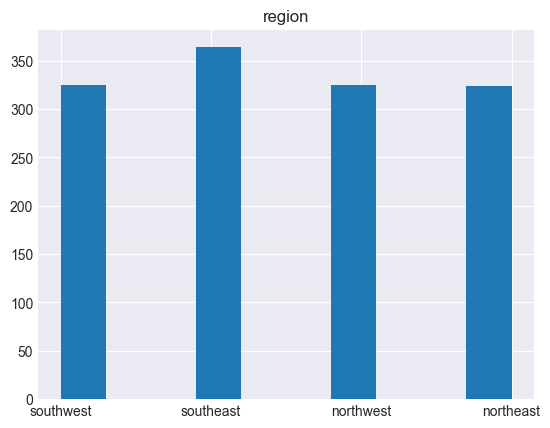

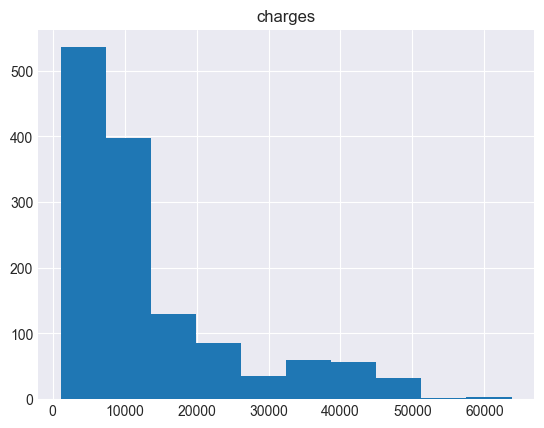

In [67]:
# no null values
# now plotting the graphs for each columns
cols = df.columns
for col in cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

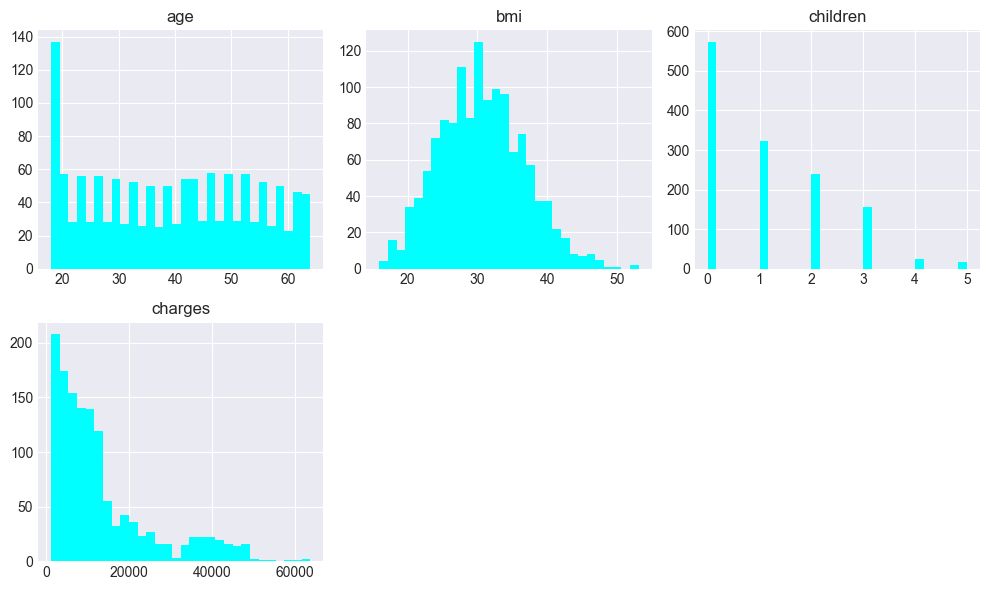

In [68]:
import math
num_cols = df.select_dtypes(include="number").columns
n = len(num_cols)

rows = math.ceil(n / 2)   # 2 plots per row
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()  # make indexing easy

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30,color='cyan')
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

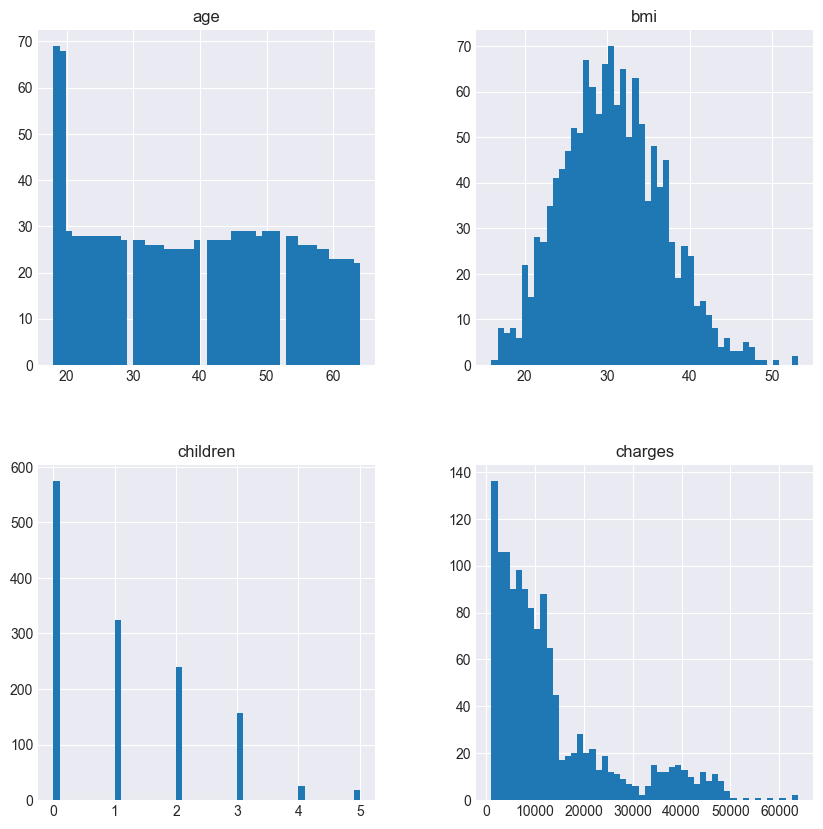

In [43]:
plt.style.use('seaborn-v0_8-darkgrid')
df.hist(bins=50,figsize=(10,10))

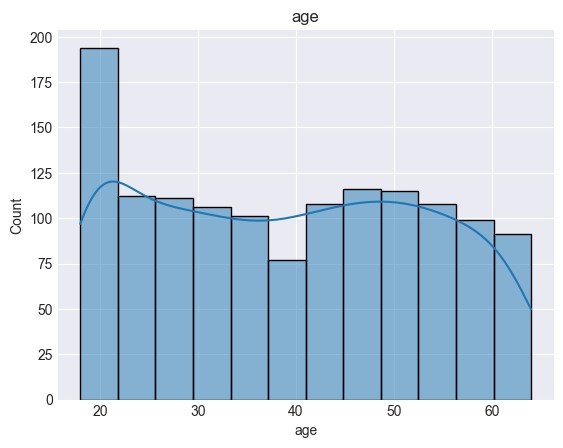

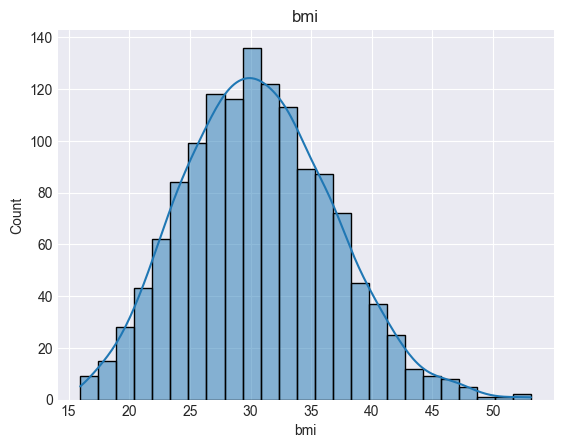

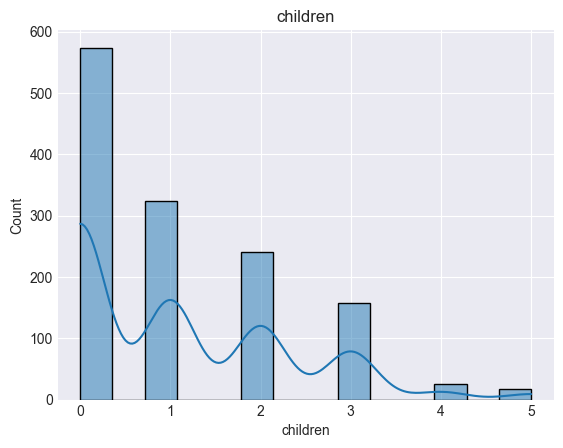

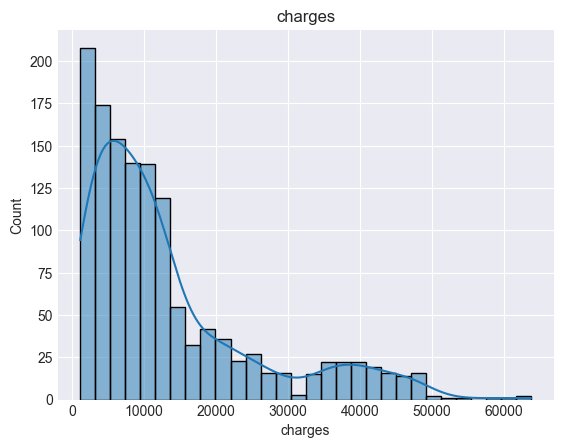

In [70]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    sns.histplot(df[col],kde=True)
    plt.title(col)
    plt.show()

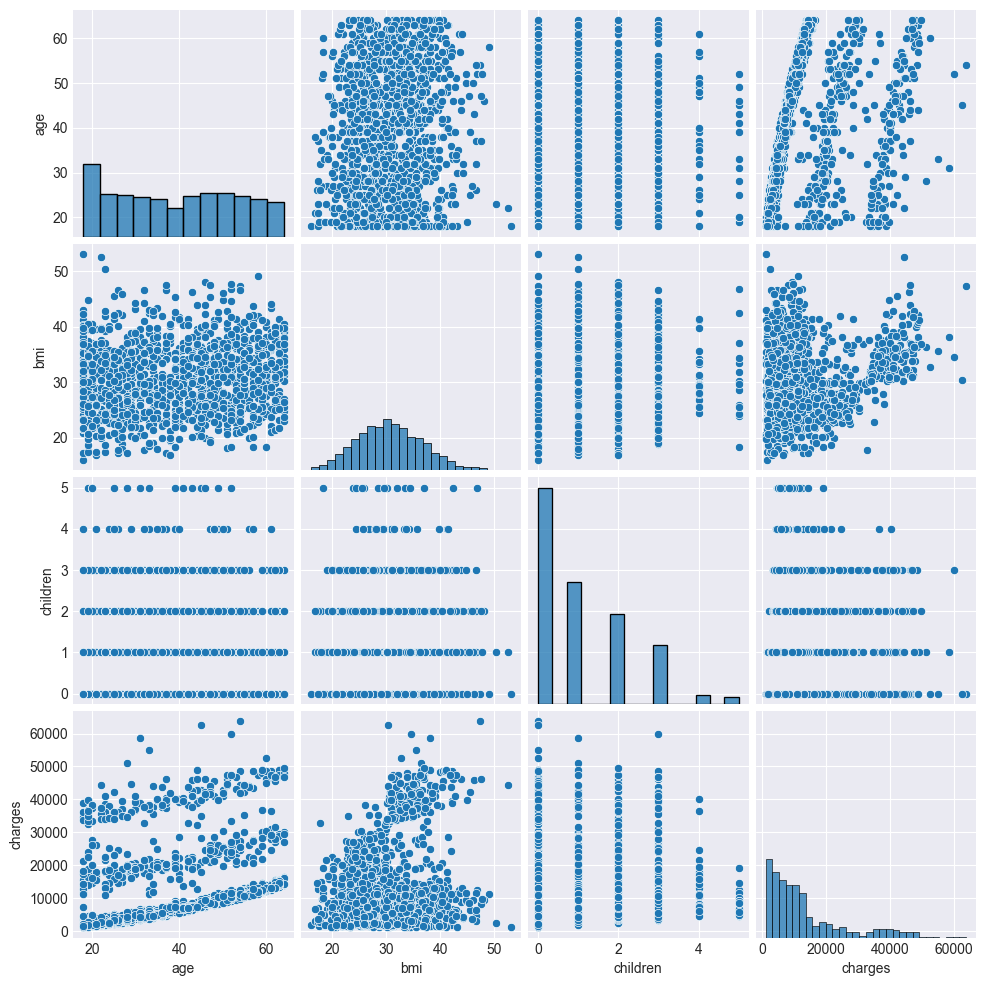

In [72]:
sns.pairplot(df)

In [74]:
pd.crosstab(df['region'], df['charges'])


charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
region,,,,,,,,,,,,,,,,,,,,,
northeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
northwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
southeast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,1
southwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


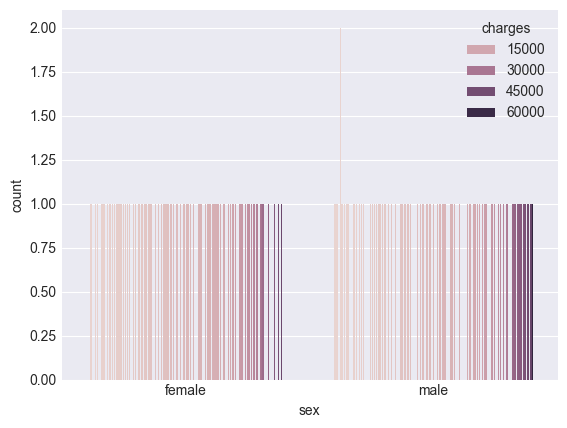

In [75]:
sns.countplot(x='sex', hue='charges', data=df)
plt.show()

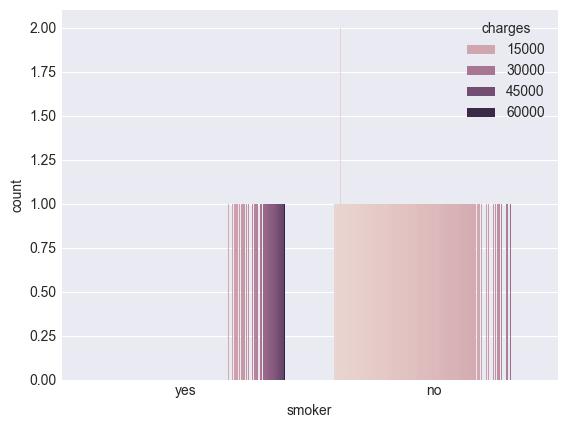

In [76]:
sns.countplot(x='smoker', hue='charges', data=df)
plt.show()

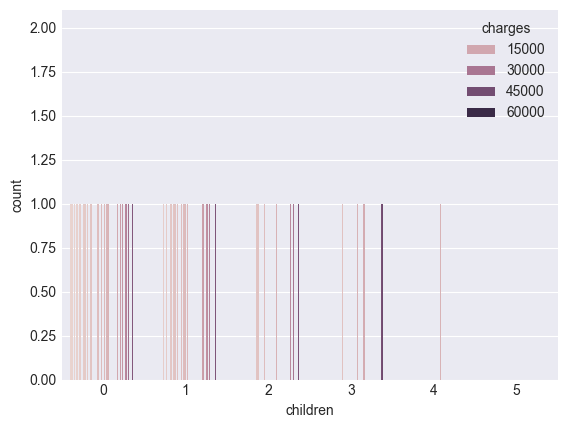

In [77]:
sns.countplot(x='children', hue='charges', data=df)
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
# now we try to see how the non numeric data type
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [80]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [81]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

All the Non-Numeric Columns have at max 4 unique values either set 0 and 1 for 'sex', 'smoker'
or perform OneHotEncoding in all of these

___________________________________________________________________________________
Alright now mapping 0 and 1 for binary features and OneHotEncoding for 'region'
- Male: 0; Female: 0
- No: 0; Yes: 1

In [82]:
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [83]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


Now Encoding the Region

In [85]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [86]:
encoded = encoder.fit_transform(df[['region']]).toarray()
encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [87]:
encoder_df = pd.DataFrame(
    encoded, columns=encoder.get_feature_names_out()
)
df=pd.concat([df,encoder_df],axis=1)

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [89]:
# now dropping region
df.drop('region',inplace=True,axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [90]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

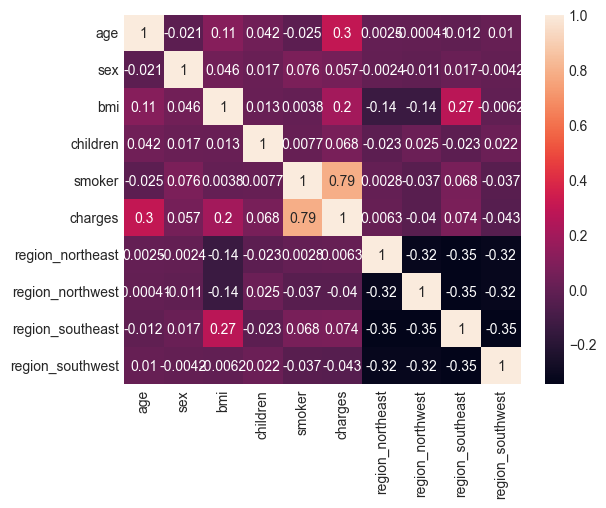

In [91]:
sns.heatmap(df.corr(),annot=True)

as we can see the smoker directly affects the charges with a 0.79 corr

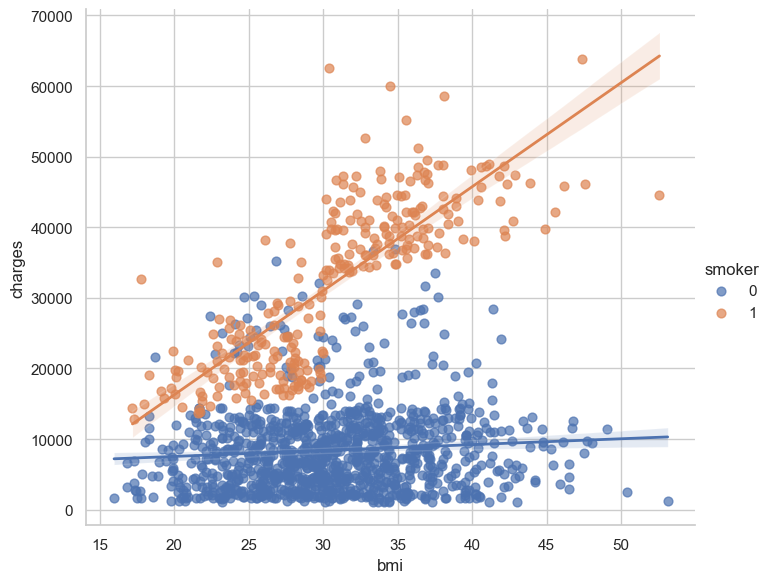

In [99]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df,
    x="bmi",
    y="charges",
    hue="smoker",
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.7, "s": 40},
    line_kws={"linewidth": 2}
)

plt.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   float64
 7   region_northwest  1338 non-null   float64
 8   region_southeast  1338 non-null   float64
 9   region_southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [94]:
# no as such outliers found still just to be sure:
# using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features
X = df.select_dtypes(include=['float64', 'int64'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature        VIF
0               age   1.373348
1               sex   1.009018
2               bmi   1.223757
3          children   1.013005
4            smoker   3.549468
5           charges   4.014662
6  region_northeast   9.548600
7  region_northwest   9.641565
8  region_southeast  12.789630
9  region_southwest  10.325573


Interpretation:
- VIF = 1 -+ No correlation
- VIF > 5 -+ Moderate correlation
- VIF > 10-4 High correlation (problematic)

In [96]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [95]:
target_col = 'charges'

# Select only feature columns for cleaning
feature_cols = df.drop(columns=target_col)

# Compute 5-number summary for all features at once
summary = feature_cols.describe().loc[['min', '25%', '50%', '75%', 'max']]
print("5-number summary for features:")
print(summary, "\n")

# Compute IQR for all features
Q1 = feature_cols.quantile(0.25)
Q3 = feature_cols.quantile(0.75)
IQR = Q3 - Q1

# Compute lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Create mask for all feature columns at once
mask = feature_cols.apply(lambda x: x.between(lower_fence[x.name], upper_fence[x.name]))

# Combine mask across columns: keep rows where all features are within IQR range
mask_all = mask.all(axis=1)

# Apply mask to original dataframe (target stays intact)
df_cleaned = df[mask_all]
# Rows that were removed (outliers)
df_dropped = df[~mask_all]  # ~ inverts the boolean mask

print("Dropped rows (outliers):")
print(df_dropped)

5-number summary for features:
      age  sex       bmi  children  smoker  region_northeast  \
min  18.0  0.0  15.96000       0.0     0.0               0.0   
25%  27.0  0.0  26.29625       0.0     0.0               0.0   
50%  39.0  1.0  30.40000       1.0     0.0               0.0   
75%  51.0  1.0  34.69375       2.0     0.0               0.0   
max  64.0  1.0  53.13000       5.0     1.0               1.0   

     region_northwest  region_southeast  region_southwest  
min               0.0               0.0               0.0  
25%               0.0               0.0               0.0  
50%               0.0               0.0               0.0  
75%               0.0               1.0               0.0  
max               1.0               1.0               1.0   

Dropped rows (outliers):
      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400               0.0   
3      33    1  22.705         0       0  21984

well since we cant just drop 70% of the dataset we will not be using 5 Number summary method and just use the data as it is
____________________________________________________________________________
